In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn import svm

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix
import joblib
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras


from os import walk

import time
import datetime
%matplotlib inline

In [2]:
X_train = [[1,2,3,4,5,6],
           [1,3,4,5,6,7],
           [1,3,5,4,3,5],
           [2,1,3,4,4,6],
           [1,2,4,3,5,7],

           [5,7,8,9,9,10],
           [4,5,6,7,8,11],
           [5,6,7,8,9,12],
           [5,5,7,8,9,10],
           [6,5,7,8,9,9]]

In [3]:
y_train = [0,0,0,0,0,1,1,1,1,1]

In [4]:
X_test = [[1,3,4,3,5,6],
          [1,2,4,3,5,7],
          [1,2,3,5,4,6],
          [1,2,3,4,3,7],
         
          [4,5,6,7,8,12],
          [4,5,6,7,9,10],
          [5,4,7,8,9,10],
          [5,6,7,9,8,12]]

In [5]:
y_test = [0,0,0,0,1,1,1,1]

## Support Vector Machine

In [6]:
model = svm.SVC(kernel='linear', decision_function_shape='ovo')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [7]:
y_predict = model.predict(X_test)

In [8]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

In [9]:
y_test

[0, 0, 0, 0, 1, 1, 1, 1]

In [10]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

,0,1
0,4,0
1,0,4


In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



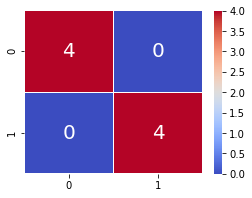

In [12]:
plt.figure(figsize=(4, 3))
heat_map = sb.heatmap(confusion, annot=True, 
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})

## Naive Bayes

In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
y_predict = model.predict(X_test)

In [15]:
y_predict

array([0, 0, 0, 0, 1, 1, 1, 1])

## Neural Network

In [6]:
model = Sequential()
model.add(Dense(6, activation='relu', kernel_initializer='he_normal', input_shape=(6,)))
model.add(Dense(5, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(3, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
model.fit(X_train, y_train, epochs=3000, batch_size=64, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/3000
1/1 [==============================] - 0s 70ms/step - loss: 2.1015 - accuracy: 0.5000
Epoch 2/3000
1/1 [==============================] - 0s 84ms/step - loss: 2.0437 - accuracy: 0.5000
Epoch 3/3000
1/1 [==============================] - 0s 71ms/step - loss: 1.9863 - accuracy: 0.5000
Epoch 4/3000
1/1 [==============================] - 0s 70ms/step - loss: 1.9298 - accuracy: 0.5000
Epoch 5/3000
1/1 [==============================] - 0s 70ms/step - loss: 1.8752 - accuracy: 0.5000
Epoch 6/3000
1/1 [==============================] - 0s 70ms/step - loss: 1.8231 - accuracy: 0.5000
Epoch 7/3000
1/1 [==============================] - 0s 61ms/step - loss: 1.7725 - accuracy: 0.5000
Epoch 8/3000
1/1 [==============================] - 0s 70ms/step - loss: 1.7269 - accuracy: 0.5000
Epoch 9/3000
1/1 [==============================] - 0s 59ms/step - loss: 1.6831 - accuracy: 0.5000
Epoch 10/3000
1/1 [==============================] - 0s 70ms/step - loss: 1.6412 - accuracy: 0.5000
Epoch 11/

1/1 [==============================] - 0s 70ms/step - loss: 0.8423 - accuracy: 0.5000
Epoch 82/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.8396 - accuracy: 0.5000
Epoch 83/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.8369 - accuracy: 0.5000
Epoch 84/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.8343 - accuracy: 0.5000
Epoch 85/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.8317 - accuracy: 0.5000
Epoch 86/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.8291 - accuracy: 0.5000
Epoch 87/3000
1/1 [==============================] - 0s 73ms/step - loss: 0.8266 - accuracy: 0.5000
Epoch 88/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.8241 - accuracy: 0.5000
Epoch 89/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.8216 - accuracy: 0.5000
Epoch 90/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.8191 - accuracy: 0.5000
Epoch 91/3000


1/1 [==============================] - 0s 50ms/step - loss: 0.6515 - accuracy: 0.5000
Epoch 163/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.6500 - accuracy: 0.5000
Epoch 164/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.6484 - accuracy: 0.5000
Epoch 165/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.6469 - accuracy: 0.5000
Epoch 166/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.6457 - accuracy: 0.5000
Epoch 167/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.6443 - accuracy: 0.5000
Epoch 168/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.6427 - accuracy: 0.5000
Epoch 169/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.6413 - accuracy: 0.5000
Epoch 170/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.6397 - accuracy: 0.5000
Epoch 171/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.6380 - accuracy: 0.5000
Epoch

1/1 [==============================] - 0s 70ms/step - loss: 0.5314 - accuracy: 0.5000
Epoch 244/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.5301 - accuracy: 0.5000
Epoch 245/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.5287 - accuracy: 0.5000
Epoch 246/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.5274 - accuracy: 0.5000
Epoch 247/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.5261 - accuracy: 0.5000
Epoch 248/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.5251 - accuracy: 0.5000
Epoch 249/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.5236 - accuracy: 0.5000
Epoch 250/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.5223 - accuracy: 0.5000
Epoch 251/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.5210 - accuracy: 0.5000
Epoch 252/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.5197 - accuracy: 0.5000
Epoc

1/1 [==============================] - 0s 80ms/step - loss: 0.4343 - accuracy: 0.9000
Epoch 325/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.4332 - accuracy: 0.9000
Epoch 326/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.4321 - accuracy: 0.9000
Epoch 327/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.4310 - accuracy: 0.9000
Epoch 328/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.4299 - accuracy: 0.9000
Epoch 329/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.4288 - accuracy: 0.9000
Epoch 330/3000
1/1 [==============================] - 0s 171ms/step - loss: 0.4277 - accuracy: 0.9000
Epoch 331/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.4266 - accuracy: 0.9000
Epoch 332/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.4255 - accuracy: 0.9000
Epoch 333/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.4245 - accuracy: 0.9000
E

Epoch 405/3000
1/1 [==============================] - 0s 106ms/step - loss: 0.3533 - accuracy: 1.0000
Epoch 406/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.3524 - accuracy: 1.0000
Epoch 407/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3516 - accuracy: 1.0000
Epoch 408/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.3507 - accuracy: 1.0000
Epoch 409/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3500 - accuracy: 1.0000
Epoch 410/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.3493 - accuracy: 1.0000
Epoch 411/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.3484 - accuracy: 1.0000
Epoch 412/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.3477 - accuracy: 1.0000
Epoch 413/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3471 - accuracy: 1.0000
Epoch 414/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.3462 - accu

1/1 [==============================] - 0s 47ms/step - loss: 0.3050 - accuracy: 1.0000
Epoch 486/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.3044 - accuracy: 1.0000
Epoch 487/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.3040 - accuracy: 1.0000
Epoch 488/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.3035 - accuracy: 1.0000
Epoch 489/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.3029 - accuracy: 1.0000
Epoch 490/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.3024 - accuracy: 1.0000
Epoch 491/3000
1/1 [==============================] - 0s 161ms/step - loss: 0.3020 - accuracy: 1.0000
Epoch 492/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.3015 - accuracy: 1.0000
Epoch 493/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.3009 - accuracy: 1.0000
Epoch 494/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.3005 - accuracy: 1.0000
E

1/1 [==============================] - 0s 120ms/step - loss: 0.2702 - accuracy: 1.0000
Epoch 567/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.2700 - accuracy: 1.0000
Epoch 568/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.2697 - accuracy: 1.0000
Epoch 569/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.2692 - accuracy: 1.0000
Epoch 570/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.2691 - accuracy: 1.0000
Epoch 571/3000
1/1 [==============================] - 0s 200ms/step - loss: 0.2689 - accuracy: 1.0000
Epoch 572/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.2686 - accuracy: 1.0000
Epoch 573/3000
1/1 [==============================] - 0s 149ms/step - loss: 0.2682 - accuracy: 1.0000
Epoch 574/3000
1/1 [==============================] - 0s 143ms/step - loss: 0.2677 - accuracy: 1.0000
Epoch 575/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.2675 - accuracy: 1.0000


Epoch 647/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.2482 - accuracy: 1.0000
Epoch 648/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.2481 - accuracy: 1.0000
Epoch 649/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.2478 - accuracy: 1.0000
Epoch 650/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.2476 - accuracy: 1.0000
Epoch 651/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.2472 - accuracy: 1.0000
Epoch 652/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.2470 - accuracy: 1.0000
Epoch 653/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.2466 - accuracy: 1.0000
Epoch 654/3000
1/1 [==============================] - 0s 151ms/step - loss: 0.2464 - accuracy: 1.0000
Epoch 655/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.2462 - accuracy: 1.0000
Epoch 656/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.2457 - ac

1/1 [==============================] - 0s 70ms/step - loss: 0.2304 - accuracy: 1.0000
Epoch 728/3000
1/1 [==============================] - 0s 150ms/step - loss: 0.2301 - accuracy: 1.0000
Epoch 729/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2300 - accuracy: 1.0000
Epoch 730/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2299 - accuracy: 1.0000
Epoch 731/3000
1/1 [==============================] - 0s 124ms/step - loss: 0.2297 - accuracy: 1.0000
Epoch 732/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2295 - accuracy: 1.0000
Epoch 733/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2293 - accuracy: 1.0000
Epoch 734/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.2290 - accuracy: 1.0000
Epoch 735/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.2288 - accuracy: 1.0000
Epoch 736/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2285 - accuracy: 1.0000
Ep

Epoch 808/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2154 - accuracy: 1.0000
Epoch 809/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.2151 - accuracy: 1.0000
Epoch 810/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2146 - accuracy: 1.0000
Epoch 811/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.2145 - accuracy: 1.0000
Epoch 812/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.2144 - accuracy: 1.0000
Epoch 813/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.2143 - accuracy: 1.0000
Epoch 814/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2141 - accuracy: 1.0000
Epoch 815/3000
1/1 [==============================] - 0s 107ms/step - loss: 0.2139 - accuracy: 1.0000
Epoch 816/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.2137 - accuracy: 1.0000
Epoch 817/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2135 - accu

1/1 [==============================] - 0s 59ms/step - loss: 0.2014 - accuracy: 1.0000
Epoch 889/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.2013 - accuracy: 1.0000
Epoch 890/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.2012 - accuracy: 1.0000
Epoch 891/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2010 - accuracy: 1.0000
Epoch 892/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.2008 - accuracy: 1.0000
Epoch 893/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2006 - accuracy: 1.0000
Epoch 894/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.2004 - accuracy: 1.0000
Epoch 895/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.2003 - accuracy: 1.0000
Epoch 896/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.2002 - accuracy: 1.0000
Epoch 897/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.2000 - accuracy: 1.0000
Ep

1/1 [==============================] - 0s 108ms/step - loss: 0.1892 - accuracy: 1.0000
Epoch 970/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1890 - accuracy: 1.0000
Epoch 971/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1889 - accuracy: 1.0000
Epoch 972/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.1888 - accuracy: 1.0000
Epoch 973/3000
1/1 [==============================] - 0s 170ms/step - loss: 0.1886 - accuracy: 1.0000
Epoch 974/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1885 - accuracy: 1.0000
Epoch 975/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1883 - accuracy: 1.0000
Epoch 976/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.1882 - accuracy: 1.0000
Epoch 977/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1880 - accuracy: 1.0000
Epoch 978/3000
1/1 [==============================] - 0s 137ms/step - loss: 0.1878 - accuracy: 1.0000


1/1 [==============================] - 0s 70ms/step - loss: 0.1783 - accuracy: 1.0000
Epoch 1050/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1779 - accuracy: 1.0000
Epoch 1051/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1778 - accuracy: 1.0000
Epoch 1052/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1777 - accuracy: 1.0000
Epoch 1053/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.1776 - accuracy: 1.0000
Epoch 1054/3000
1/1 [==============================] - 0s 77ms/step - loss: 0.1774 - accuracy: 1.0000
Epoch 1055/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.1773 - accuracy: 1.0000
Epoch 1056/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1772 - accuracy: 1.0000
Epoch 1057/3000
1/1 [==============================] - 0s 114ms/step - loss: 0.1770 - accuracy: 1.0000
Epoch 1058/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1769 - accuracy: 

1/1 [==============================] - 0s 50ms/step - loss: 0.1680 - accuracy: 1.0000
Epoch 1130/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.1678 - accuracy: 1.0000
Epoch 1131/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1677 - accuracy: 1.0000
Epoch 1132/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1676 - accuracy: 1.0000
Epoch 1133/3000
1/1 [==============================] - 0s 148ms/step - loss: 0.1675 - accuracy: 1.0000
Epoch 1134/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1674 - accuracy: 1.0000
Epoch 1135/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1673 - accuracy: 1.0000
Epoch 1136/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.1671 - accuracy: 1.0000
Epoch 1137/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1670 - accuracy: 1.0000
Epoch 1138/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1669 - accuracy: 1

1/1 [==============================] - 0s 70ms/step - loss: 0.1587 - accuracy: 1.0000
Epoch 1210/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.1585 - accuracy: 1.0000
Epoch 1211/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1584 - accuracy: 1.0000
Epoch 1212/3000
1/1 [==============================] - 0s 115ms/step - loss: 0.1583 - accuracy: 1.0000
Epoch 1213/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1582 - accuracy: 1.0000
Epoch 1214/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1581 - accuracy: 1.0000
Epoch 1215/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1579 - accuracy: 1.0000
Epoch 1216/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1578 - accuracy: 1.0000
Epoch 1217/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1577 - accuracy: 1.0000
Epoch 1218/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.1575 - accuracy:

1/1 [==============================] - 0s 72ms/step - loss: 0.1500 - accuracy: 1.0000
Epoch 1290/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.1499 - accuracy: 1.0000
Epoch 1291/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1498 - accuracy: 1.0000
Epoch 1292/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1497 - accuracy: 1.0000
Epoch 1293/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1496 - accuracy: 1.0000
Epoch 1294/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1495 - accuracy: 1.0000
Epoch 1295/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.1494 - accuracy: 1.0000
Epoch 1296/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1493 - accuracy: 1.0000
Epoch 1297/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1492 - accuracy: 1.0000
Epoch 1298/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1491 - accuracy: 1.

1/1 [==============================] - 0s 61ms/step - loss: 0.1420 - accuracy: 1.0000
Epoch 1370/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.1419 - accuracy: 1.0000
Epoch 1371/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.1418 - accuracy: 1.0000
Epoch 1372/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.1417 - accuracy: 1.0000
Epoch 1373/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.1416 - accuracy: 1.0000
Epoch 1374/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1415 - accuracy: 1.0000
Epoch 1375/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.1414 - accuracy: 1.0000
Epoch 1376/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1413 - accuracy: 1.0000
Epoch 1377/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1411 - accuracy: 1.0000
Epoch 1378/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1410 - accuracy:

1/1 [==============================] - 0s 70ms/step - loss: 0.1345 - accuracy: 1.0000
Epoch 1450/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1344 - accuracy: 1.0000
Epoch 1451/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1343 - accuracy: 1.0000
Epoch 1452/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1342 - accuracy: 1.0000
Epoch 1453/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.1341 - accuracy: 1.0000
Epoch 1454/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1340 - accuracy: 1.0000
Epoch 1455/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.1339 - accuracy: 1.0000
Epoch 1456/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.1338 - accuracy: 1.0000
Epoch 1457/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1337 - accuracy: 1.0000
Epoch 1458/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.1339 - accuracy: 

1/1 [==============================] - 0s 130ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 1530/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1275 - accuracy: 1.0000
Epoch 1531/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1274 - accuracy: 1.0000
Epoch 1532/3000
1/1 [==============================] - 0s 170ms/step - loss: 0.1273 - accuracy: 1.0000
Epoch 1533/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.1273 - accuracy: 1.0000
Epoch 1534/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.1272 - accuracy: 1.0000
Epoch 1535/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.1271 - accuracy: 1.0000
Epoch 1536/3000
1/1 [==============================] - 0s 67ms/step - loss: 0.1270 - accuracy: 1.0000
Epoch 1537/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.1269 - accuracy: 1.0000
Epoch 1538/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1269 - accuracy:

1/1 [==============================] - 0s 70ms/step - loss: 0.1211 - accuracy: 1.0000
Epoch 1610/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1210 - accuracy: 1.0000
Epoch 1611/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.1210 - accuracy: 1.0000
Epoch 1612/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1209 - accuracy: 1.0000
Epoch 1613/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1208 - accuracy: 1.0000
Epoch 1614/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.1207 - accuracy: 1.0000
Epoch 1615/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1206 - accuracy: 1.0000
Epoch 1616/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1206 - accuracy: 1.0000
Epoch 1617/3000
1/1 [==============================] - 0s 57ms/step - loss: 0.1205 - accuracy: 1.0000
Epoch 1618/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.1204 - accuracy: 1

1/1 [==============================] - 0s 110ms/step - loss: 0.1150 - accuracy: 1.0000
Epoch 1690/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.1149 - accuracy: 1.0000
Epoch 1691/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.1148 - accuracy: 1.0000
Epoch 1692/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1148 - accuracy: 1.0000
Epoch 1693/3000
1/1 [==============================] - 0s 65ms/step - loss: 0.1147 - accuracy: 1.0000
Epoch 1694/3000
1/1 [==============================] - 0s 129ms/step - loss: 0.1146 - accuracy: 1.0000
Epoch 1695/3000
1/1 [==============================] - 0s 50ms/step - loss: 0.1146 - accuracy: 1.0000
Epoch 1696/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1145 - accuracy: 1.0000
Epoch 1697/3000
1/1 [==============================] - 0s 102ms/step - loss: 0.1144 - accuracy: 1.0000
Epoch 1698/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1144 - accuracy:

1/1 [==============================] - 0s 120ms/step - loss: 0.1094 - accuracy: 1.0000
Epoch 1770/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1093 - accuracy: 1.0000
Epoch 1771/3000
1/1 [==============================] - 0s 69ms/step - loss: 0.1093 - accuracy: 1.0000
Epoch 1772/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.1092 - accuracy: 1.0000
Epoch 1773/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.1091 - accuracy: 1.0000
Epoch 1774/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.1090 - accuracy: 1.0000
Epoch 1775/3000
1/1 [==============================] - 0s 147ms/step - loss: 0.1089 - accuracy: 1.0000
Epoch 1776/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1089 - accuracy: 1.0000
Epoch 1777/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.1088 - accuracy: 1.0000
Epoch 1778/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1087 - accuracy:

1/1 [==============================] - 0s 86ms/step - loss: 0.1041 - accuracy: 1.0000
Epoch 1849/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.1040 - accuracy: 1.0000
Epoch 1850/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.1039 - accuracy: 1.0000
Epoch 1851/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1039 - accuracy: 1.0000
Epoch 1852/3000
1/1 [==============================] - 0s 128ms/step - loss: 0.1038 - accuracy: 1.0000
Epoch 1853/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.1037 - accuracy: 1.0000
Epoch 1854/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.1037 - accuracy: 1.0000
Epoch 1855/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.1036 - accuracy: 1.0000
Epoch 1856/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.1035 - accuracy: 1.0000
Epoch 1857/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.1035 - accuracy: 

1/1 [==============================] - 0s 120ms/step - loss: 0.0991 - accuracy: 1.0000
Epoch 1929/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0990 - accuracy: 1.0000
Epoch 1930/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 1931/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0989 - accuracy: 1.0000
Epoch 1932/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 1933/3000
1/1 [==============================] - 0s 140ms/step - loss: 0.0988 - accuracy: 1.0000
Epoch 1934/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0987 - accuracy: 1.0000
Epoch 1935/3000
1/1 [==============================] - 0s 150ms/step - loss: 0.0986 - accuracy: 1.0000
Epoch 1936/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0986 - accuracy: 1.0000
Epoch 1937/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0985 - accuracy:

1/1 [==============================] - 0s 120ms/step - loss: 0.0944 - accuracy: 1.0000
Epoch 2009/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 2010/3000
1/1 [==============================] - 0s 75ms/step - loss: 0.0943 - accuracy: 1.0000
Epoch 2011/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 2012/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 2013/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0941 - accuracy: 1.0000
Epoch 2014/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0941 - accuracy: 1.0000
Epoch 2015/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 2016/3000
1/1 [==============================] - 0s 66ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 2017/3000
1/1 [==============================] - 0s 118ms/step - loss: 0.0939 - accuracy:

1/1 [==============================] - 0s 63ms/step - loss: 0.0900 - accuracy: 1.0000
Epoch 2089/3000
1/1 [==============================] - 0s 131ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 2090/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 2091/3000
1/1 [==============================] - 0s 187ms/step - loss: 0.0899 - accuracy: 1.0000
Epoch 2092/3000
1/1 [==============================] - 0s 55ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 2093/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0898 - accuracy: 1.0000
Epoch 2094/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 2095/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0897 - accuracy: 1.0000
Epoch 2096/3000
1/1 [==============================] - 0s 127ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 2097/3000
1/1 [==============================] - 0s 62ms/step - loss: 0.0895 - accuracy:

1/1 [==============================] - 0s 140ms/step - loss: 0.0858 - accuracy: 1.0000
Epoch 2169/3000
1/1 [==============================] - 0s 135ms/step - loss: 0.0857 - accuracy: 1.0000
Epoch 2170/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.0857 - accuracy: 1.0000
Epoch 2171/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0856 - accuracy: 1.0000
Epoch 2172/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0856 - accuracy: 1.0000
Epoch 2173/3000
1/1 [==============================] - 0s 150ms/step - loss: 0.0855 - accuracy: 1.0000
Epoch 2174/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0855 - accuracy: 1.0000
Epoch 2175/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0855 - accuracy: 1.0000
Epoch 2176/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0854 - accuracy: 1.0000
Epoch 2177/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.0854 - accura

1/1 [==============================] - 0s 70ms/step - loss: 0.0820 - accuracy: 1.0000
Epoch 2248/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0819 - accuracy: 1.0000
Epoch 2249/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0819 - accuracy: 1.0000
Epoch 2250/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0818 - accuracy: 1.0000
Epoch 2251/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0817 - accuracy: 1.0000
Epoch 2252/3000
1/1 [==============================] - 0s 104ms/step - loss: 0.0817 - accuracy: 1.0000
Epoch 2253/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0816 - accuracy: 1.0000
Epoch 2254/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0816 - accuracy: 1.0000
Epoch 2255/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 2256/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0815 - accuracy: 

1/1 [==============================] - 0s 72ms/step - loss: 0.0783 - accuracy: 1.0000
Epoch 2328/3000
1/1 [==============================] - 0s 112ms/step - loss: 0.0782 - accuracy: 1.0000
Epoch 2329/3000
1/1 [==============================] - 0s 72ms/step - loss: 0.0782 - accuracy: 1.0000
Epoch 2330/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0781 - accuracy: 1.0000
Epoch 2331/3000
1/1 [==============================] - 0s 81ms/step - loss: 0.0781 - accuracy: 1.0000
Epoch 2332/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.0781 - accuracy: 1.0000
Epoch 2333/3000
1/1 [==============================] - 0s 130ms/step - loss: 0.0780 - accuracy: 1.0000
Epoch 2334/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0780 - accuracy: 1.0000
Epoch 2335/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0779 - accuracy: 1.0000
Epoch 2336/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0779 - accuracy: 

1/1 [==============================] - 0s 70ms/step - loss: 0.0747 - accuracy: 1.0000
Epoch 2408/3000
1/1 [==============================] - 0s 76ms/step - loss: 0.0747 - accuracy: 1.0000
Epoch 2409/3000
1/1 [==============================] - 0s 78ms/step - loss: 0.0746 - accuracy: 1.0000
Epoch 2410/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0746 - accuracy: 1.0000
Epoch 2411/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 2412/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 2413/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 2414/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0745 - accuracy: 1.0000
Epoch 2415/3000
1/1 [==============================] - 0s 125ms/step - loss: 0.0744 - accuracy: 1.0000
Epoch 2416/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0744 - accuracy: 1

1/1 [==============================] - 0s 59ms/step - loss: 0.0715 - accuracy: 1.0000
Epoch 2488/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0714 - accuracy: 1.0000
Epoch 2489/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0714 - accuracy: 1.0000
Epoch 2490/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0713 - accuracy: 1.0000
Epoch 2491/3000
1/1 [==============================] - 0s 121ms/step - loss: 0.0713 - accuracy: 1.0000
Epoch 2492/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0713 - accuracy: 1.0000
Epoch 2493/3000
1/1 [==============================] - 0s 150ms/step - loss: 0.0712 - accuracy: 1.0000
Epoch 2494/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0712 - accuracy: 1.0000
Epoch 2495/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0711 - accuracy: 1.0000
Epoch 2496/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0711 - accuracy:

1/1 [==============================] - 0s 132ms/step - loss: 0.0684 - accuracy: 1.0000
Epoch 2568/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0683 - accuracy: 1.0000
Epoch 2569/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0682 - accuracy: 1.0000
Epoch 2570/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0682 - accuracy: 1.0000
Epoch 2571/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0682 - accuracy: 1.0000
Epoch 2572/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0681 - accuracy: 1.0000
Epoch 2573/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.0681 - accuracy: 1.0000
Epoch 2574/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0681 - accuracy: 1.0000
Epoch 2575/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0680 - accuracy: 1.0000
Epoch 2576/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0680 - accuracy:

1/1 [==============================] - 0s 70ms/step - loss: 0.0654 - accuracy: 1.0000
Epoch 2648/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0654 - accuracy: 1.0000
Epoch 2649/3000
1/1 [==============================] - 0s 122ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 2650/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 2651/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 2652/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0652 - accuracy: 1.0000
Epoch 2653/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0652 - accuracy: 1.0000
Epoch 2654/3000
1/1 [==============================] - 0s 58ms/step - loss: 0.0652 - accuracy: 1.0000
Epoch 2655/3000
1/1 [==============================] - 0s 109ms/step - loss: 0.0651 - accuracy: 1.0000
Epoch 2656/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0651 - accuracy: 

1/1 [==============================] - 0s 110ms/step - loss: 0.0626 - accuracy: 1.0000
Epoch 2728/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 2729/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 2730/3000
1/1 [==============================] - 0s 119ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 2731/3000
1/1 [==============================] - 0s 54ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 2732/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 2733/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0624 - accuracy: 1.0000
Epoch 2734/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0623 - accuracy: 1.0000
Epoch 2735/3000
1/1 [==============================] - 0s 141ms/step - loss: 0.0623 - accuracy: 1.0000
Epoch 2736/3000
1/1 [==============================] - 0s 100ms/step - loss: 0.0622 - accuracy

1/1 [==============================] - 0s 60ms/step - loss: 0.0599 - accuracy: 1.0000
Epoch 2808/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0599 - accuracy: 1.0000
Epoch 2809/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 2810/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 2811/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0598 - accuracy: 1.0000
Epoch 2812/3000
1/1 [==============================] - 0s 59ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 2813/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 2814/3000
1/1 [==============================] - 0s 70ms/step - loss: 0.0597 - accuracy: 1.0000
Epoch 2815/3000
1/1 [==============================] - 0s 60ms/step - loss: 0.0596 - accuracy: 1.0000
Epoch 2816/3000
1/1 [==============================] - 0s 110ms/step - loss: 0.0596 - accuracy: 1.

1/1 [==============================] - 0s 91ms/step - loss: 0.0574 - accuracy: 1.0000
Epoch 2888/3000
1/1 [==============================] - 0s 87ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 2889/3000
1/1 [==============================] - 0s 160ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 2890/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 2891/3000
1/1 [==============================] - 0s 90ms/step - loss: 0.0573 - accuracy: 1.0000
Epoch 2892/3000
1/1 [==============================] - 0s 84ms/step - loss: 0.0572 - accuracy: 1.0000
Epoch 2893/3000
1/1 [==============================] - 0s 85ms/step - loss: 0.0572 - accuracy: 1.0000
Epoch 2894/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0572 - accuracy: 1.0000
Epoch 2895/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0571 - accuracy: 1.0000
Epoch 2896/3000
1/1 [==============================] - 0s 80ms/step - loss: 0.0571 - accuracy: 

1/1 [==============================] - 0s 70ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 2968/3000
1/1 [==============================] - 0s 120ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 2969/3000
1/1 [==============================] - 0s 64ms/step - loss: 0.0550 - accuracy: 1.0000
Epoch 2970/3000
1/1 [==============================] - 0s 71ms/step - loss: 0.0549 - accuracy: 1.0000
Epoch 2971/3000
1/1 [==============================] - 0s 117ms/step - loss: 0.0549 - accuracy: 1.0000
Epoch 2972/3000
1/1 [==============================] - 0s 74ms/step - loss: 0.0549 - accuracy: 1.0000
Epoch 2973/3000
1/1 [==============================] - 0s 63ms/step - loss: 0.0548 - accuracy: 1.0000
Epoch 2974/3000
1/1 [==============================] - 0s 111ms/step - loss: 0.0548 - accuracy: 1.0000
Epoch 2975/3000
1/1 [==============================] - 0s 68ms/step - loss: 0.0548 - accuracy: 1.0000
Epoch 2976/3000
1/1 [==============================] - 0s 61ms/step - loss: 0.0547 - accuracy: 

In [10]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22004), started 5 days, 8:46:24 ago. (Use '!kill 22004' to kill it.)

In [11]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

1/1 [==============================] - 0s 4ms/step - loss: 0.0765 - accuracy: 1.0000


In [12]:
acc

1.0

In [13]:
y_predict = model.predict(X_test)
y_predict

array([[1.2708630e-04],
       [3.9464849e-06],
       [1.9081599e-05],
       [1.4872411e-05],
       [8.5220945e-01],
       [8.9812350e-01],
       [8.5205883e-01],
       [8.3184862e-01]], dtype=float32)

In [28]:
cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=[0,1],
                        columns=[0,1])
confusion

ValueError: Classification metrics can't handle a mix of binary and continuous targets

# Test Data of the Book

In [15]:
from sklearn.datasets import load_iris

In [16]:
data = load_iris()

In [18]:
len(data)

6

In [20]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  